# Sales Data Analysis


#### BY: OLUWASEUN BADMUS

Embarking on a comprehensive journey through the world of sales data, I conducted a multifaceted Sales Data Analysis that revealed intriguing insights into consumer behaviour and revenue trends. The analysis encompasses a range of key aspects, each shedding light on different dimensions of sales dynamics.

### Data Collection

In [1]:
#load libraries
import pandas as pd 
import numpy as np  
import matplotlib.pylab as plt
import seaborn as sns


# Import the warnings module to handle warnings in Python
import warnings

# Use the filterwarnings() function from the warnings module
# to ignore all future warnings during the execution of the code
warnings.filterwarnings('ignore')



from itertools import combinations
from collections import Counter

In [2]:
#To load a Feather file in Python, you can use the pyarrow library
# Install the 'pyarrow' library using the pip package manager
# This library provides support for working with various columnar and binary data formats
# including the Feather file format for efficient data storage and manipulation.
#!pip install pyarrow

In [3]:
# Path to Sales data
file_path = r'/Users/seun/Desktop/Sales_data.ftr'

# Load the Feather file into a DataFrame
all_data = pd.read_feather(file_path)

In [4]:
# dimensions of all_data dataframe (rows, columns)
all_data.shape

(186850, 6)

In [5]:
# column names of the all_data dateframe
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

* Order ID: A unique identifier for each order.
* Product: The name or identifier of the product being ordered.
* Quantity Ordered: The quantity of the product ordered in each order.
* Price Each: The price of each unit of the product.
* Order Date: The date when the order was placed.
* Purchase Address: The address where the purchase was made.

In [6]:
# show the first 5 rows using dataframe.head() method
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
# Create a copy of the original DataFrame
all_data_2 = all_data.copy()

#### Data Cleaning

In [8]:
#Evaluating for Missing Data
missing_data = all_data.isnull()
#The output is a boolean value 
#"True" represents a missing value and "False" means the value is present in the dataset
missing_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [9]:
#Count missing values in each column
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
# Drop rows with missing values (545 rows) from the DataFrame
all_data.dropna(inplace=True)

In [11]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
all_data.info

<bound method DataFrame.info of        Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0

In [13]:
#After dropping 545 rows with missing values, the DataFrame now comprises 186,305 rows and 6 columns

In [14]:
# Count the number of duplicated rows in the all_data DataFrame
duplicate_count = all_data.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 618


In [15]:
#To view some of the duplicated rows
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [16]:
# Drop duplicated rows
all_data = all_data.drop_duplicates()

In [17]:
#check the shape of the DataFrame without duplicates to show the number of remaining rows and columns
all_data.shape

(185687, 6)

In [18]:
# After removing duplicates, let's ensure that none are left
remaining_duplicates = all_data[all_data.duplicated()]

# Check to confirm the absence of remaining duplicates
if remaining_duplicates.empty:
    print("No duplicates remain in the dataset.")
else:
    print("Some duplicates still exist in the dataset. Further investigation may be needed.")

No duplicates remain in the dataset.


## 1. Monthly Sale Analysis

The Monthly Sales Analysis highlights the revenue trends for each month. The analysis involved extracting insights from the 'Order Date' data to categorize sales by month. The 'Sales' column represents the calculated monthly revenue, derived by multiplying 'Quantity Ordered' and 'Price Each.'

In [19]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [20]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [21]:
# Extracting month from "Order Date"
all_data['Order Date'][0].split('/')[0] 

'04'

In [22]:
def return_month(x):
    return x.split('/')[0]



In [23]:
# Apply the 'return_month' function to the 'Order Date' column and create a new 'Month' column
all_data['Month'] = all_data['Order Date'].apply(return_month) 

In [24]:
all_data['Month']

0         04
2         04
3         04
4         04
5         04
          ..
186845    09
186846    09
186847    09
186848    09
186849    09
Name: Month, Length: 185687, dtype: object

In [25]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [26]:
# Convert the 'Month' column to integer data type
all_data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'Order Date'

In [27]:
all_data['Month'].unique() 

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [28]:
all_data[all_data['Month'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [29]:
all_data = all_data[all_data['Month'] != 'Order Date']

In [30]:
all_data['Month'].unique() 

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [31]:
all_data['Month'] = all_data['Month'].astype(int)

In [32]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int64
dtype: object

In [33]:
# Convert data types for Quantity Ordered and Price Each columns
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [34]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

In [35]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4


In [36]:
# Calculate the 'sales' column by multiplying 'Quantity Ordered' and 'Price Each'
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [37]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [38]:
all_data_monthly_sales = all_data.groupby(['Month'])['Sales'].sum()

In [39]:
all_data_monthly_sales

Month
1     1.821413e+06
2     2.200078e+06
3     2.804973e+06
4     3.389218e+06
5     3.150616e+06
6     2.576280e+06
7     2.646461e+06
8     2.241083e+06
9     2.094466e+06
10    3.734778e+06
11    3.197875e+06
12    4.608296e+06
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='Sales'>

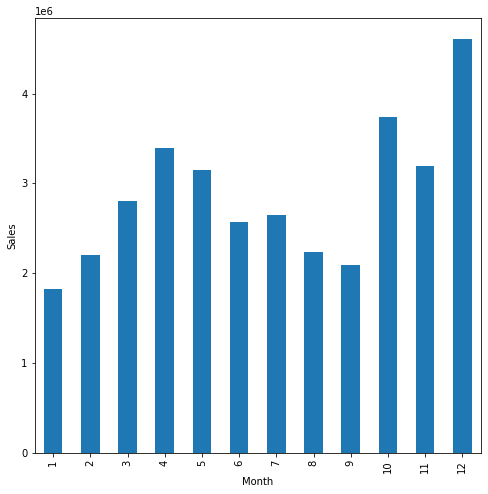

In [40]:
all_data_monthly_sales.plot(kind='bar', figsize=(8, 8), xlabel='Month', ylabel='Sales')

The data illustrates varying sales patterns throughout the year, with December notably exhibiting the highest sales at approximately $4.61 million, followed by October and April. This comprehensive analysis empowers businesses to make informed decisions and tailor strategies to capitalize on peak sales months while understanding market dynamics.

## 2. Exploring: City with the Highest Order Volume

In this exploration, I directed my focus toward uncovering valuable insights hidden within the geographic distribution of order volumes. By analyzing the data through the lens of city-specific order volumes, I sought to identify the location that stands out as the hub of sales activity. 

In [41]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [42]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [43]:
## extracting city from "Purchase Address"
all_data['Purchase Address'][0].split(',')[1] 

' Dallas'

In [44]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip()

In [45]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston


In [46]:
all_data['City']

0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
186845      Los Angeles
186846    San Francisco
186847    San Francisco
186848    San Francisco
186849    San Francisco
Name: City, Length: 185686, dtype: object

In [47]:
unique_cities = all_data['City'].unique()
print("Unique cities",unique_cities)

Unique cities ['Dallas' 'Boston' 'Los Angeles' 'San Francisco' 'Seattle' 'Atlanta'
 'New York City' 'Portland' 'Austin']


In [48]:
all_data['City'].value_counts()

San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: City, dtype: int64

The table above displays order volumes for various cities, with San Francisco leading at 44,662 orders. This likely reflects its larger population and economic activity. Cities like Los Angeles and New York City also show significant order numbers. Conversely, cities such as Austin and Portland have lower volumes, suggesting potential growth opportunities. The variation underscores regional differences, while the data could indicate urban-suburban dynamics. 

In [49]:
City_sales = all_data['City'].value_counts()

<AxesSubplot:title={'center':'Distribution of Sales by City'}, ylabel='City'>

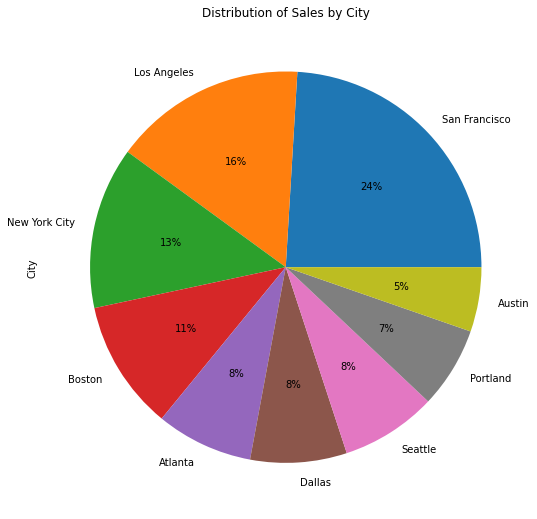

In [50]:
City_sales.plot(kind='pie', autopct='%1.0f%%', figsize=(9, 9), title='Distribution of Sales by City')

The plot above shows that New York, Los Angeles, and San Francisco are the top three cities with the highest number of orders.

## 3. Analysis: Decoding the Top-Selling Product

In [51]:
all_data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [52]:
# Group the data by product and calculate aggregated information
# Calculate the total quantity ordered and average price for each product
product_summary = all_data.groupby('Product').agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

In [53]:
product_summary = product_summary.reset_index()

The "Product summary table" offers a comprehensive overview of various products, their corresponding quantities ordered, and individual prices, enabling the decoding of top-selling products. 

In [54]:
product_summary

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


Through analysis, it becomes apparent which products are in high demand due to their consistently higher quantities ordered, reflecting customer preferences and market trends. The diverse range of product categories highlights the breadth of customer interests, while the price information provides insights into affordability and revenue potential. Additionally, opportunities for cross-selling and strategic decision-making emerge as patterns in customer purchasing behavior become evident, guiding effective inventory management and targeted marketing efforts.

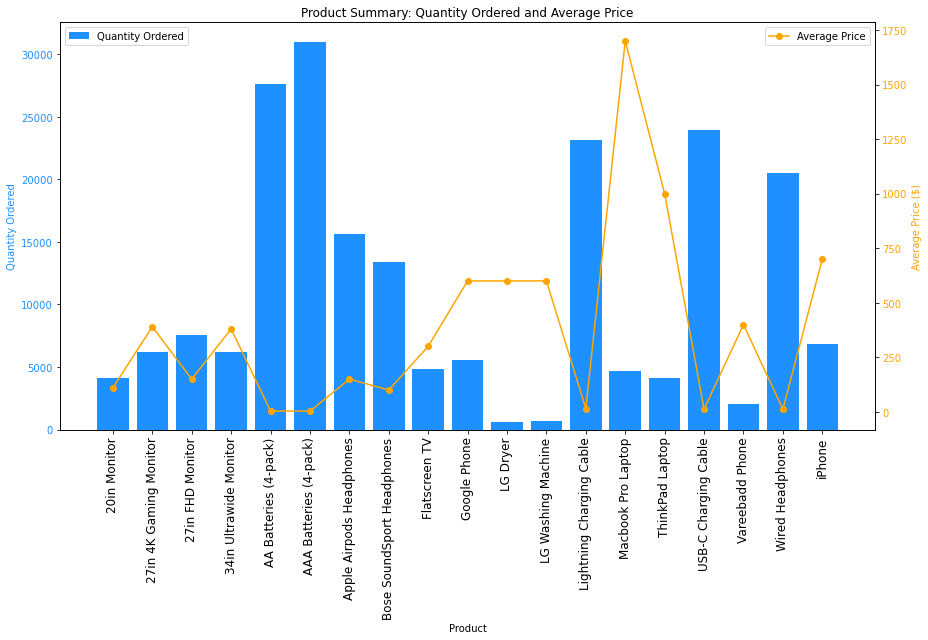

In [55]:
product_names = product_summary['Product']
quantity_ordered = product_summary['Quantity Ordered']
average_price = product_summary['Price Each']

fig, ax1 = plt.subplots(figsize=(13, 9))

# Bar plot for quantity ordered
ax1.bar(product_names, quantity_ordered, color='dodgerblue', label='Quantity Ordered')
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='dodgerblue')
ax1.tick_params(axis='y', labelcolor='dodgerblue')
ax1.legend(loc='upper left')
ax1.set_xticklabels(product_names, rotation='vertical', fontsize=12)

# Create a twin axes for average price
ax2 = ax1.twinx()
ax2.plot(product_names, average_price, color='orange', marker='o', label='Average Price')
ax2.set_ylabel('Average Price ($)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper right')

# Title and grid
plt.title('Product Summary: Quantity Ordered and Average Price')
#plt.grid(True)
plt.tight_layout()

# Rotate product names vertically
plt.xticks(rotation='vertical')


plt.show()

The plot above indicates that the product 'AAA Batteries (4-pack)' stands out as the top-selling item, indicated by its significantly higher quantity ordered compared to other products. Secondly, a discernible correlation is observed between product price and quantity ordered. Products with lower prices, like batteries, exhibit a trend of higher quantities ordered, suggesting that customers are more inclined to purchase products that are competitively priced. These insights collectively underscore the importance of understanding customer preferences and pricing strategies to optimize sales and product offerings.

## 4. Unveiling Monthly Sales Patterns: Analysis of Top 5 Best-Selling Products

In this investigative journey, I focused on the dynamic world of sales patterns, with a keen eye on the top performers. By delving into the data surrounding the five best-selling products, I aimed to uncover hidden trends that reveal the interplay between these products and the passage of time. 

In [56]:
# Identify the top 5 most sold products
top_products = all_data['Product'].value_counts()[0:5].index
top_products

Index(['USB-C Charging Cable', 'Lightning Charging Cable',
       'AAA Batteries (4-pack)', 'AA Batteries (4-pack)', 'Wired Headphones'],
      dtype='object')

In [57]:
# Filter the data to include only rows corresponding to the top products
top_products_df = all_data[all_data['Product'].isin(top_products)]
top_products_df


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186840,259349,AAA Batteries (4-pack),1,2.99,09/01/19 22:14,"911 River St, Dallas, TX 75001",9,2.99,Dallas
186842,259350,USB-C Charging Cable,1,11.95,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",9,11.95,San Francisco
186844,259352,USB-C Charging Cable,1,11.95,09/07/19 15:49,"976 Forest St, San Francisco, CA 94016",9,11.95,San Francisco
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles


In [58]:
# This provides insights into the sales distribution of the top products over different months
product_monthly_sales = top_products_df.groupby(['Month', 'Product'])['Quantity Ordered'].sum().reset_index()

In [59]:
product_monthly_sales

,Month,Product,Quantity Ordered
0,1,AA Batteries (4-pack),1423
1,1,AAA Batteries (4-pack),1600
2,1,Lightning Charging Cable,1153
3,1,USB-C Charging Cable,1284
4,1,Wired Headphones,1083
5,2,AA Batteries (4-pack),1733
6,2,AAA Batteries (4-pack),1971
7,2,Lightning Charging Cable,1497
8,2,USB-C Charging Cable,1651
9,2,Wired Headphones,1275


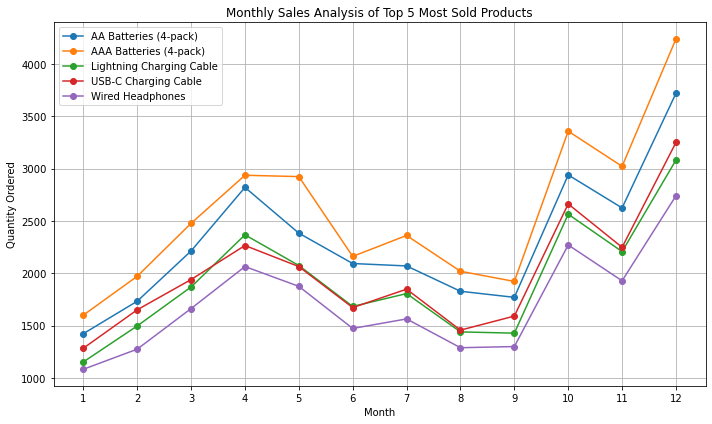

In [63]:
product_names = product_monthly_sales['Product']
months = product_monthly_sales['Month']
sales_quantities = product_monthly_sales['Quantity Ordered']

plt.figure(figsize=(10, 6))

# Create a line plot for each product's sales over months
for product in product_names.unique():
    product_data = product_monthly_sales[product_monthly_sales['Product'] == product]
    plt.plot(product_data['Month'], product_data['Quantity Ordered'], marker='o', label=product)

plt.xlabel('Month')
plt.ylabel('Quantity Ordered')
plt.title('Monthly Sales Analysis of Top 5 Most Sold Products')
plt.xticks(months.unique())
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

The the plot above presents a comprehensive view of the monthly sales patterns for the top 5 most sold products. Notably, there is a consistent demand for 'AA Batteries (4-pack)' and 'AAA Batteries (4-pack)' throughout the year, with peak quantities ordered in December. The sales of 'Lightning Charging Cable' and 'USB-C Charging Cable' demonstrate strong sales in the earlier months, while 'Wired Headphones' maintain relatively steady sales across most months. The data showcases both seasonal fluctuations and stable demand trends, indicating potential opportunities for targeted marketing and inventory management strategies to maximize sales and customer satisfaction for these popular products.

## 5. Unlocking Customer Preferences: Analysis of Frequently Sold Product Combinations

In this analysis, I delved into the intriguing world of customer preferences by examining frequently sold product combinations. By exploring the combinations of products that customers tended to purchase together—leveraging the similarity of order IDs—I aimed to uncover valuable insights into their buying behaviors and preferences. This study not only shed light on popular pairings but also provided me with a glimpse into cross-selling opportunities and potential strategies for enhancing customer experience.

In [61]:
# Create a list of product combinations from each order
order_product_combinations = [
    list(combinations(order, 2))
    for order in all_data.groupby('Order ID')['Product'].apply(list)
]

# Flatten the list of combinations
all_combinations = [item for sublist in order_product_combinations for item in sublist]

# Count the occurrences of each combination
combination_counts = Counter(all_combinations)

# Find the most common combinations
top_combinations = combination_counts.most_common(10)  # Top 10 combinations

# Print the most common combinations
for combination, count in top_combinations:
    print(f"{combination[0]} and {combination[1]} - Count: {count}")


iPhone and Lightning Charging Cable - Count: 1002
Google Phone and USB-C Charging Cable - Count: 985
iPhone and Wired Headphones - Count: 447
Google Phone and Wired Headphones - Count: 413
Vareebadd Phone and USB-C Charging Cable - Count: 361
iPhone and Apple Airpods Headphones - Count: 360
Google Phone and Bose SoundSport Headphones - Count: 220
USB-C Charging Cable and Wired Headphones - Count: 159
Vareebadd Phone and Wired Headphones - Count: 143
Lightning Charging Cable and Wired Headphones - Count: 92


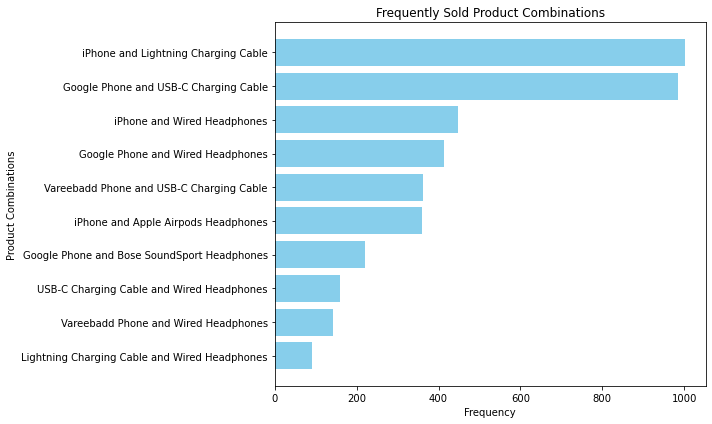

In [62]:
# Extract product pairs and their counts for plotting
product_pairs = [f"{pair[0]} and {pair[1]}" for pair, count in top_combinations]
pair_counts = [count for pair, count in top_combinations]

# Create a bar plot for the most common product combinations
plt.figure(figsize=(10, 6))
plt.barh(product_pairs, pair_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Product Combinations')
plt.title('Frequently Sold Product Combinations')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.tight_layout()

plt.show()

The plot above illustrates the frequent product combinations, revealing that customers often choose to purchase phones alongside corresponding charging cables, highlighting a strong inclination towards cross-device compatibility. Additionally, audio accessories, both wired and wireless headphones, emerge as popular companions for phones, indicating a substantial interest in enhancing audio experiences. The inclusion of diverse phone models within these combinations underscores the variety of customer preferences, while the significant occurrence of bundles like "Google Phone and USB-C Charging Cable" and "iPhone and Apple Airpods Headphones" offers strategic opportunities for targeted marketing and effective upselling approaches. In essence, these insights underscore the crucial role of complementary accessories and provide actionable data-driven guidance for optimizing product promotion and customer engagement strategies.